In [11]:
import sys
!{sys.executable} -m pip install pandas numpy seaborn matplotlib
import sys
!{sys.executable} -m pip install pandas numpy seaborn matplotlib


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
# --- 1. CONFIGURACIÓN DE RUTAS ---
# Usamos las rutas absolutas para evitar errores de carpetas
ruta_lectura = '/home/jeison/Escritorio/Banco_de_datos/datasets/dataset_sdn.csv'
ruta_guardado = '/home/jeison/Escritorio/Banco_de_datos/datasets/dataset_sdn_Automated_DDoS.csv'

In [14]:
# carga y limpieza 

print("Cargando dataset...")
# Cargamos 100k filas para no agotar la RAM de la VM
df = pd.read_csv(ruta_lectura, nrows=100000, low_memory=False)

# Limpieza de nombres (quitar espacios en blanco de las columnas)
df.columns = df.columns.str.strip()

# Limpieza de valores infinitos y nulos (crítico para IA)
df = df.replace([np.inf, -np.inf], np.nan).dropna()

print(f"Dataset cargado con éxito. Forma: {df.shape}")

df.head()

Cargando dataset...
Dataset cargado con éxito. Forma: (99494, 23)


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [17]:
print(df.columns.tolist())


['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


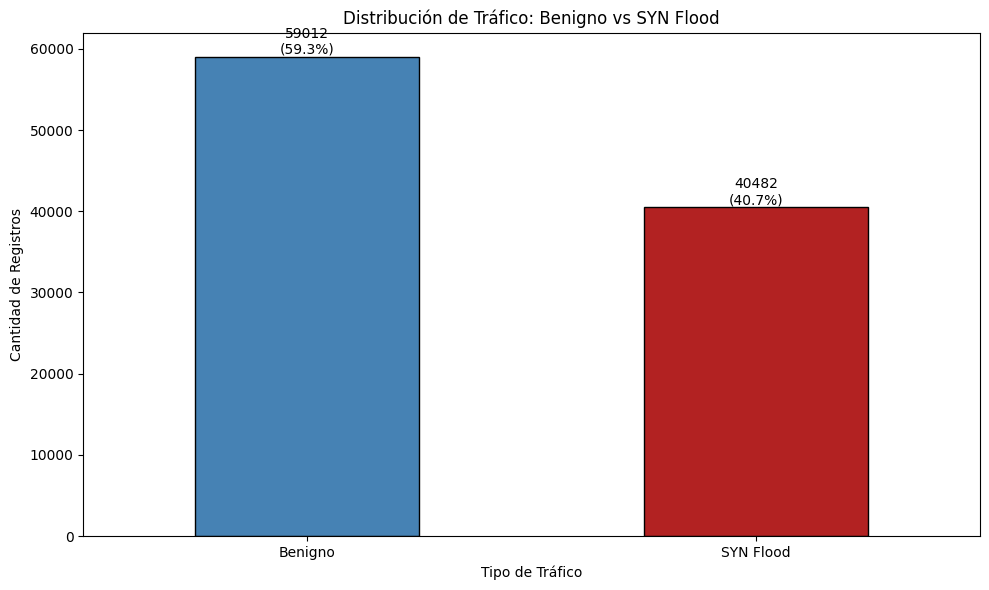

In [20]:
# Visualizacion de datos

# Conteo de clases
conteo = df['label'].value_counts().sort_index()

# Cambiar etiquetas
conteo.index = ['Benigno', 'SYN Flood']

# Crear gráfico
plt.figure(figsize=(10, 6))
ax = conteo.plot(kind='bar', color=['steelblue', 'firebrick'], edgecolor='black')

plt.title('Distribución de Tráfico: Benigno vs SYN Flood')
plt.xlabel('Tipo de Tráfico')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=0)

# Agregar valores y porcentajes
total = conteo.sum()
for i, valor in enumerate(conteo):
    porcentaje = (valor / total) * 100
    ax.text(i, valor, f'{valor}\n({porcentaje:.1f}%)',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [23]:
# Filtrado y guardado

# Filtrar solo tráfico Benigno y SYN Flood
syn_data = df[df['label'].isin([0, 1])]

# Guardar dataset filtrado
syn_data.to_csv(ruta_guardado, index=False)

print("--- PROCESO COMPLETADO ---")
print(f"Se han guardado {len(syn_data)} filas validadas.")
print(f"Ubicación del archivo: {ruta_guardado}")

--- PROCESO COMPLETADO ---
Se han guardado 99494 filas validadas.
Ubicación del archivo: /home/jeison/Escritorio/Banco_de_datos/datasets/dataset_sdn_Automated_DDoS.csv


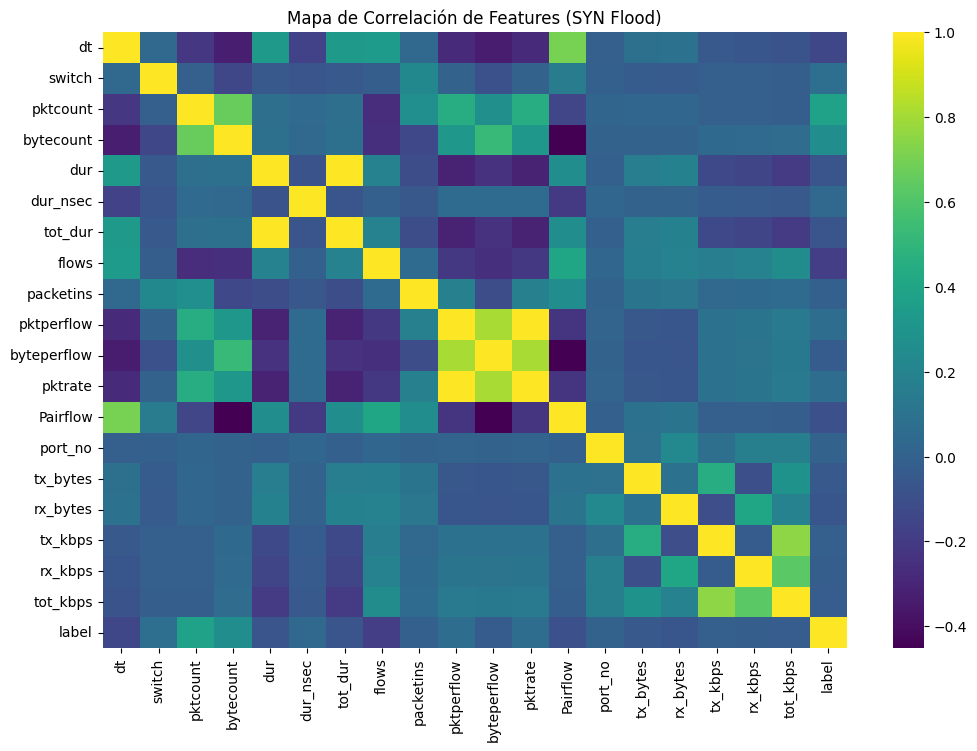

In [24]:
# Features y analisis

# Mapa de calor solo con columnas numéricas
plt.figure(figsize=(12, 8))
numeric_df = syn_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=False, cmap='viridis')
plt.title('Mapa de Correlación de Features (SYN Flood)')
plt.show()